#**TEXT MODELLING ON 20_NEWSGROUP DATASET**

In [1]:
''' This dataset is a collection of news which are posted on some 20 topics which can be used for the experiments in machine learning techniques, it comprises of nearly 18000 values in the dataset
'''
# Loading the data

import pandas as pd
df=pd.read_csv('/content/20_newsgroup.csv')
input_df= df.head(5000)
print(input_df.head())

   Unnamed: 0  ...                        date
0           0  ...  2021-04-14 00:22:28.522383
1          17  ...  2021-04-14 00:22:28.522383
2          29  ...  2021-04-14 00:22:28.522383
3          56  ...  2021-04-14 00:22:28.522383
4          64  ...  2021-04-14 00:22:28.522383

[5 rows x 5 columns]


**EDA - Exploratory Data Analysis**

In [2]:
# Finding the shape of dataset
input_df.shape

(5000, 5)

In [3]:
# Find the basic information of the dataset and for the null values
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   text        4892 non-null   object
 2   target      5000 non-null   int64 
 3   title       5000 non-null   object
 4   date        5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [4]:
#Checking for null and non-null values in the dataset using the info() dot match

print(input_df.isnull().sum())
# Dropping the null values

input_df=input_df.dropna()

Unnamed: 0      0
text          108
target          0
title           0
date            0
dtype: int64


In [5]:
#performing the steps of data preprocessing:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")

# cleaning the text data

input_df['cleaned_data'] = input_df['text'].str.replace(r"\W", " ").str.strip()# 1. Removing the special characters and punctuations
input_df['cleaned_data'] = input_df['cleaned_data'].str.replace(r'\d+',"") #2.Removing the digits from the data 
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split())) #Converting the whole text in the dataset into lower case
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #Removing the stop words
input_df

#data cleaning of Labels

input_df['labels'] = input_df['title'].str.replace(r"\W", " ").str.strip()# 1.Removing the special characters and punctuations
input_df['labels'] = input_df['labels'].apply(lambda x: " ".join(x.lower() for x in x.split())) #Converting the whole text in the dataset into lower case
input_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Unnamed: 0,text,target,title,date,cleaned_data,labels
0,0,I was wondering if anyone out there could enli...,7,rec.autos,2021-04-14 00:22:28.522383,wondering anyone could enlighten car saw day d...,rec autos
1,17,I recently posted an article asking what kind ...,7,rec.autos,2021-04-14 00:22:28.522383,recently posted article asking kind rates sing...,rec autos
2,29,\nIt depends on your priorities. A lot of peo...,7,rec.autos,2021-04-14 00:22:28.522383,depends priorities lot people put higher prior...,rec autos
3,56,an excellent automatic can be found in the sub...,7,rec.autos,2021-04-14 00:22:28.522383,excellent automatic found subaru legacy switch...,rec autos
4,64,: Ford and his automobile. I need information...,7,rec.autos,2021-04-14 00:22:28.522383,ford automobile need information whether ford ...,rec autos
...,...,...,...,...,...,...,...
4995,5860,In three years of riding in the cities of San ...,8,rec.motorcycles,2021-04-14 00:22:28.522383,three years riding cities san jose santa clara...,rec motorcycles
4996,5861,\n\tDo I have to be the one to say it?\n\n\tDO...,8,rec.motorcycles,2021-04-14 00:22:28.522383,one say stupid leave helmet seat fall go boom ...,rec motorcycles
4997,5870,\n\n\tI must have missed the article on the Sp...,8,rec.motorcycles,2021-04-14 00:22:28.522383,must missed article spagthorpe viking one litt...,rec motorcycles
4998,5960,"\n Well, you can accomplish both goals, actua...",8,rec.motorcycles,2021-04-14 00:22:28.522383,well accomplish goals actually definite physic...,rec motorcycles


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# The vectorizer object is used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# Applying the transformation
tf = vectorizer.fit_transform(input_df['cleaned_data']).toarray()

# tf_feature_names tells us the word of each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [7]:
import sys
sys.path.insert(1,'/content/')

**LDA TEXT MODELLING**

In [9]:
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
def LDA_MODEL(number_of_topics,tf,feature_names, no_top_words):
  number_of_topics = 10
  model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
  model.fit(tf)
  return display_topics(model,feature_names, no_top_words)
  pass

def display_topics(model, feature_names, no_top_words):
  topic_dict = {}
  for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
  return pd.DataFrame.from_dict(topic_dict)

In [10]:
import time
# starting time
start = time.time()
for i in range(10):
    print(i)
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)
result = LDA_MODEL(10,tf,tf_feature_names,10)
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

result

0
1
2
3
4
5
6
7
8
9
Runtime of the program is 22.572111129760742


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,space,1014.6,edu,960.0,scsi,481.5,would,1142.6,w,3625.1,gun,593.9,max,4541.1,windows,916.8,file,329.3,u,2840.2
1,image,558.8,com,722.0,mb,143.4,one,1118.3,_,974.0,would,487.9,q,3707.8,drive,801.6,health,221.5,g,2716.1
2,data,489.0,mail,401.9,edu,109.9,like,822.2,x,807.5,people,413.4,p,1957.1,use,662.8,medical,201.2,r,2661.7
3,nasa,402.8,please,355.6,soon,97.8,get,713.5,z,760.4,guns,290.1,r,1195.2,card,617.0,april,177.4,b,2196.6
4,available,371.5,e,224.6,banks,93.0,time,605.2,v,646.1,one,259.2,g,1134.5,one,560.8,research,175.4,l,2185.1
5,program,361.1,send,216.9,bit,91.6,think,586.6,c,608.3,law,227.0,n,1016.3,system,533.4,study,171.8,p,2098.0
6,also,337.9,thanks,212.2,gordon,91.3,car,577.4,u,506.5,government,212.7,u,747.6,would,530.6,states,165.5,k,2092.5
7,graphics,326.4,email,196.2,pitt,78.9,know,545.1,k,470.2,right,205.5,f,705.0,disk,473.8,national,152.4,h,2036.5
8,images,296.1,anyone,161.0,mac,78.2,much,543.2,p,381.4,weapons,199.1,v,614.3,know,469.1,university,151.1,q,2001.0
9,software,295.9,info,160.9,surrender,77.5,good,532.6,q,290.5,firearms,185.8,tm,477.4,get,466.3,center,145.7,c,1830.1


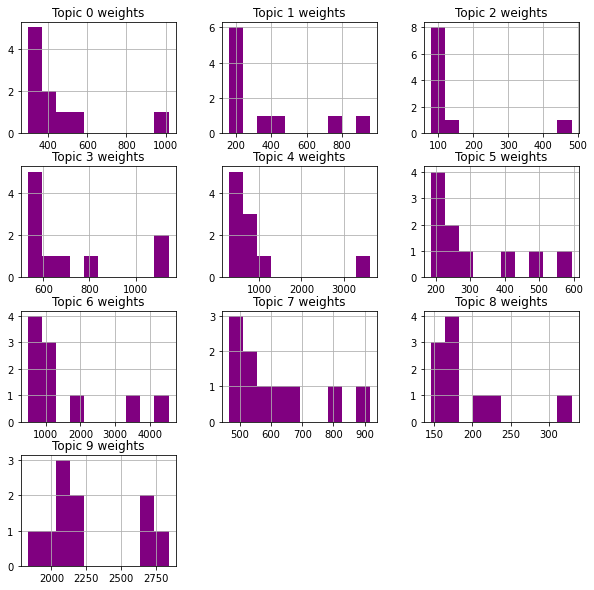

In [11]:
import matplotlib.pyplot as plt
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  result[i] = pd.to_numeric(result[i])
result.hist(figsize=(10,10),color = 'Purple')
plt.show(block=False)

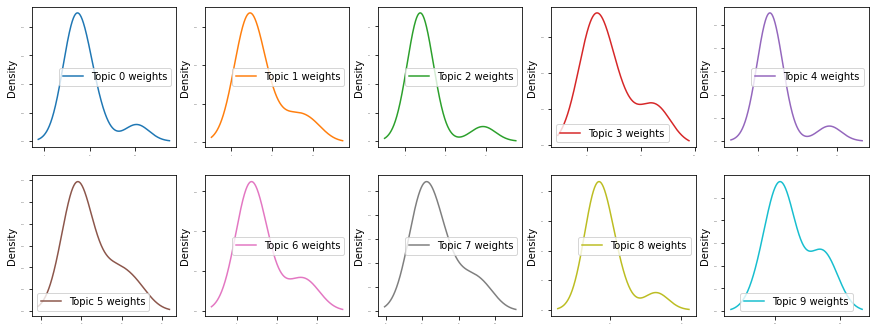

In [12]:
result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

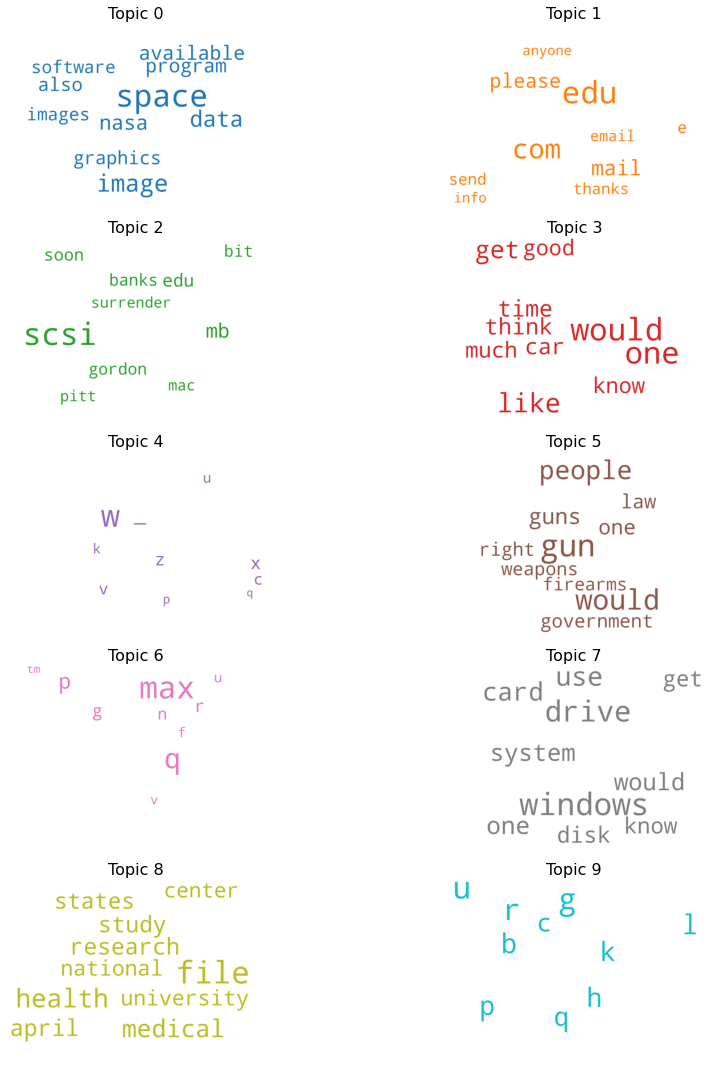

In [13]:
# Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
my_stopwords = nltk.corpus.stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i)+" words" for i in range(0,10)]
topics = list()

for i in columns_list:
  topics.append(result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]

for i in columns_list:
  frequencies.append(result[i].values)


fig, axes = plt.subplots(5,2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


**LSA Topic Modelling**

In [14]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd

def LSA_MODEL(tf,vectorizer):
  svd_model = TruncatedSVD(n_components=20, algorithm ='randomized', n_iter=100, random_state=122)
  svd_model.fit(tf)
  terms = vectorizer.get_feature_names()
  df = pd.DataFrame()
  for i, comp in enumerate(svd_model.components_):
    term_comp = zip(terms,comp)
    sorted_terms = sorted(term_comp, key = lambda x:x[1], reverse = True)[:7]
    str1 = "Topic "+str(i)
    str2 = str1 + " weights"
    str1_list = list()
    str2_list = list()
    for j in sorted_terms:
      str1_list.append(j[0])
      str2_list.append(j[1])
    df[str1] = str1_list
    df[str2] = str2_list
  return df

In [15]:
import time

# starting time
start = time.time()
for i in range(10):
    print(i)
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

lsa_result=LSA_MODEL(tf,vectorizer)
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")
lsa_result

0
1
2
3
4
5
6
7
8
9
Runtime of the program is 30.770207405090332


,Topic 0,Topic 0 weights,Topic 1,Topic 1 weights,Topic 2,Topic 2 weights,Topic 3,Topic 3 weights,Topic 4,Topic 4 weights,Topic 5,Topic 5 weights,Topic 6,Topic 6 weights,Topic 7,Topic 7 weights,Topic 8,Topic 8 weights,Topic 9,Topic 9 weights,Topic 10,Topic 10 weights,Topic 11,Topic 11 weights,Topic 12,Topic 12 weights,Topic 13,Topic 13 weights,Topic 14,Topic 14 weights,Topic 15,Topic 15 weights,Topic 16,Topic 16 weights,Topic 17,Topic 17 weights,Topic 18,Topic 18 weights,Topic 19,Topic 19 weights
0,w,0.454193,w,0.725244,max,0.703025,q,0.410019,k,0.356550,file,0.395672,_,0.620660,u,0.652609,file,0.658287,drive,0.246340,q,0.366754,space,0.315056,image,0.336054,os,0.327355,k,0.516329,p,0.462871,space,0.423534,gif,0.269180,graphics,0.205252,n,0.531540
1,q,0.372159,z,0.082830,w,0.415155,g,0.393933,g,0.309676,edu,0.250307,g,0.354811,p,0.253908,gun,0.254035,disk,0.238710,_,0.277381,launch,0.180948,gif,0.212279,bit,0.225717,v,0.451485,n,0.304326,launch,0.239944,com,0.260109,dod,0.182641,tm,0.386837
2,u,0.278592,x,0.081488,q,0.108434,r,0.271950,max,0.306958,image,0.218979,x,0.289958,_,0.213685,congress,0.143897,drives,0.191385,l,0.267213,image,0.148882,color,0.188118,scsi,0.189712,p,0.265323,z,0.282143,file,0.161057,edu,0.230254,would,0.152912,_,0.248878
3,p,0.270095,k,0.079561,tm,0.031753,w,0.128705,u,0.300666,data,0.144172,c,0.175277,sl,0.173343,firearms,0.130250,r,0.176920,k,0.224456,satellite,0.111159,bit,0.158599,mac,0.183591,z,0.146456,l,0.125618,satellite,0.147769,os,0.139530,pub,0.145366,v,0.204567
4,g,0.265572,c,0.072499,hz,0.025630,ah,0.045579,r,0.228649,use,0.140591,r,0.133043,x,0.143775,control,0.123409,hard,0.176186,z,0.198217,one,0.096156,images,0.131766,mb,0.145709,ah,0.127348,g,0.124538,nasa,0.112257,quality,0.130530,mail,0.141674,u,0.127286
5,r,0.260915,_,0.061313,bj,0.018240,u,0.044836,l,0.128086,graphics,0.138881,z,0.077484,c,0.125067,bill,0.118344,p,0.171086,disk,0.111351,gif,0.087597,format,0.119734,ibm,0.144625,air,0.094783,f,0.114318,bit,0.099554,color,0.096081,like,0.127542,graphics,0.098753
6,max,0.221334,hz,0.047446,sp,0.011728,tm,0.041103,b,0.124389,also,0.136081,hz,0.068764,b,0.080696,mr,0.106386,scsi,0.170595,drive,0.099789,would,0.087566,version,0.106672,com,0.117312,b,0.079697,radius,0.080077,commercial,0.099211,see,0.088734,ray,0.125841,sl,0.078732


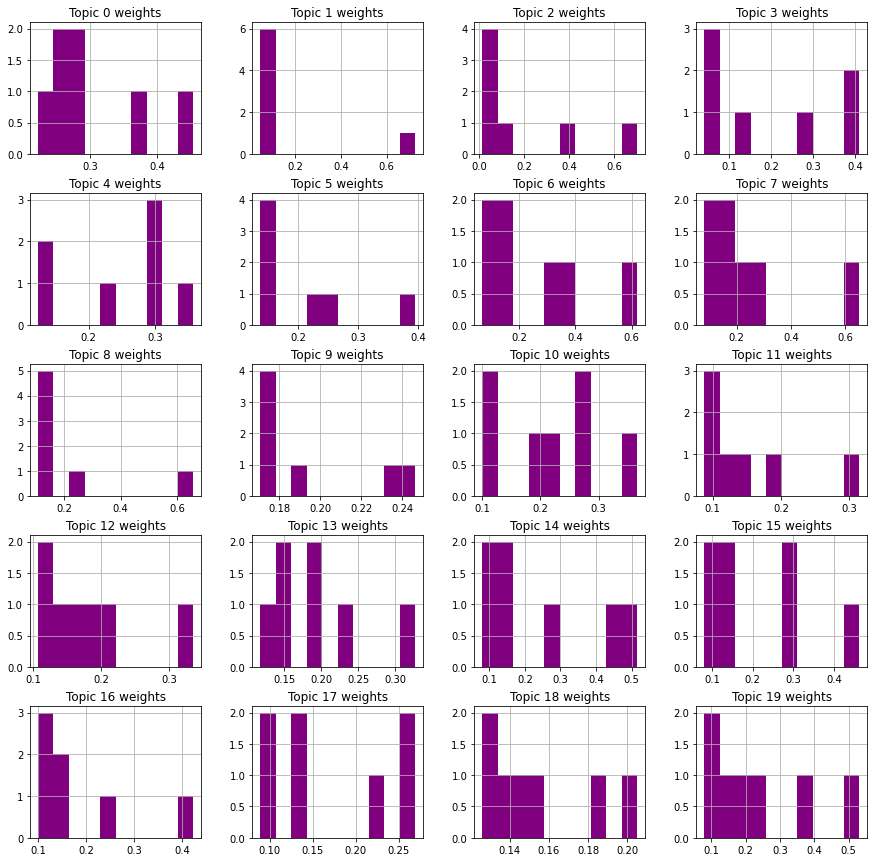

In [16]:
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  lsa_result[i] = pd.to_numeric(lsa_result[i])
lsa_result.hist(figsize=(15,15),color = 'purple')
plt.show(block=False)

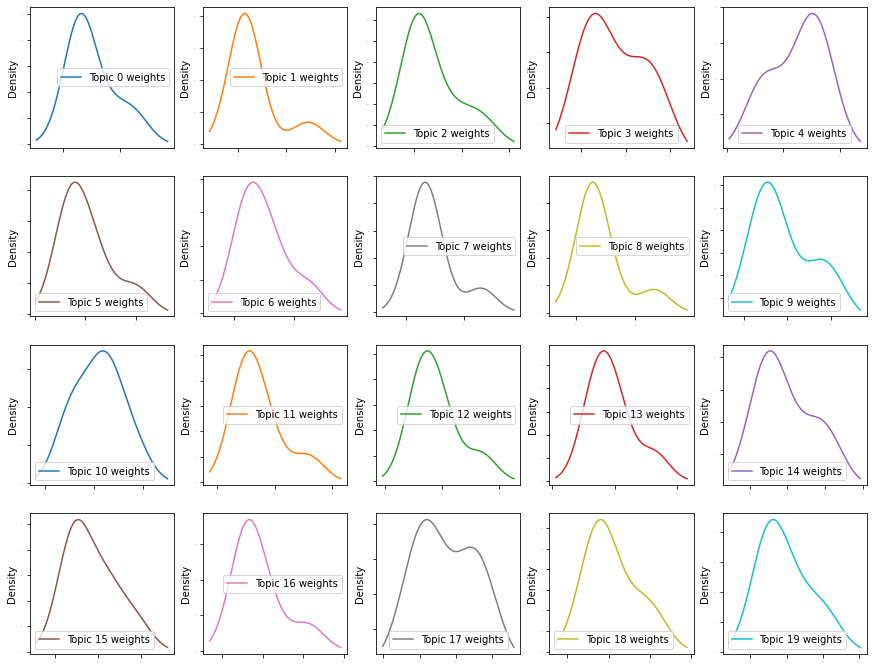

In [17]:
lsa_result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

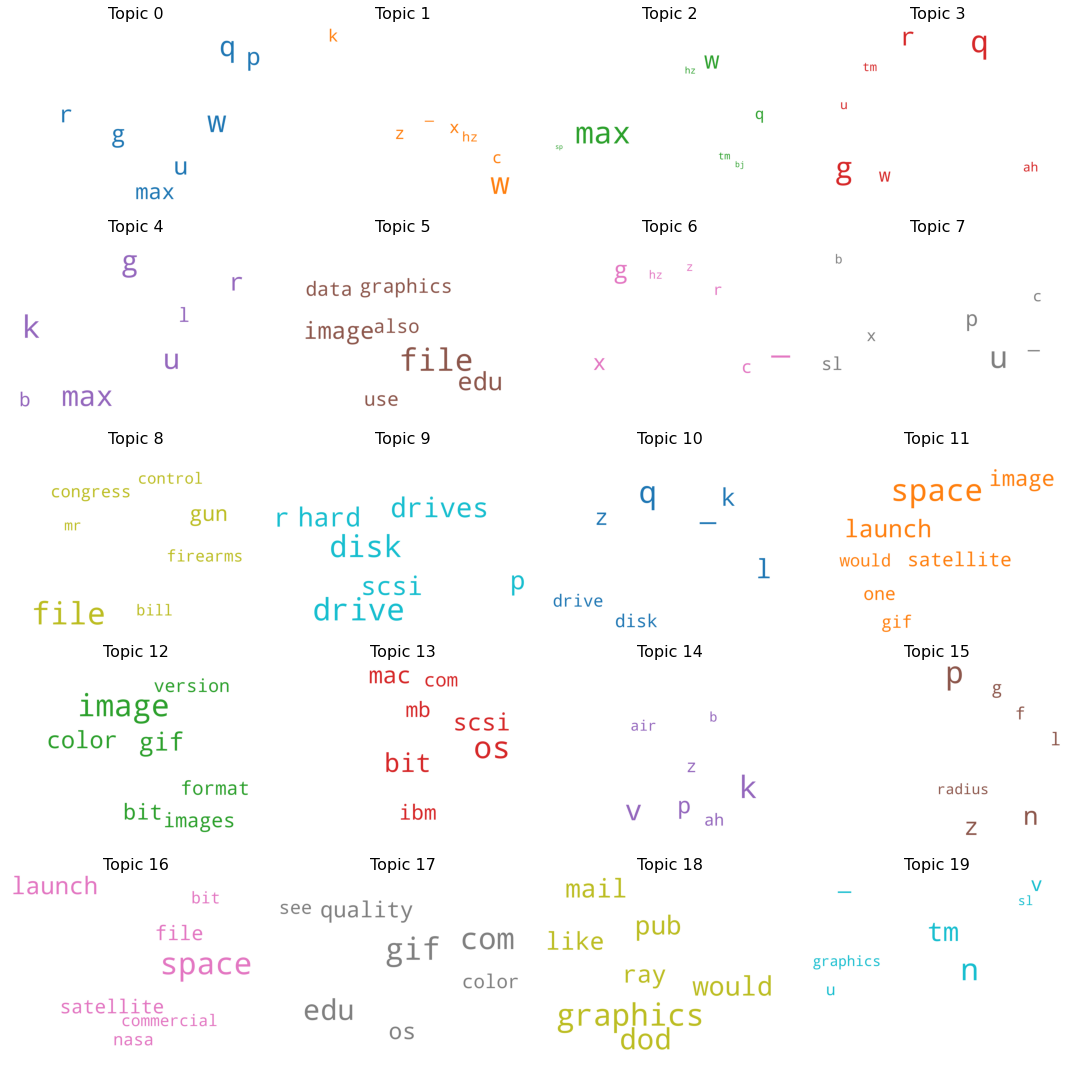

In [18]:
# 1. Wordcloud of Top N words in each topic

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols*2
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i) for i in range(0,20)]
topics = list()

for i in columns_list:
  topics.append(lsa_result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,20)]

for i in columns_list:
  frequencies.append(lsa_result[i].values)


fig, axes = plt.subplots(5,4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


**HMM - LDA Topic Modelling**

In [19]:
from __future__ import print_function
import time

from six.moves import xrange
import numpy as np
from scipy.special import gammaln

class BaseTopicModel(object):
    def __init__(self, n_doc, n_voca, **kwargs):
        self.n_doc = n_doc
        self.n_voca = n_voca
        self.verbose = kwargs.pop('verbose', True)

class BaseGibbsParamTopicModel(BaseTopicModel):


    def __init__(self, n_doc, n_voca, n_topic, alpha, beta, **kwargs):
        super(BaseGibbsParamTopicModel, self).__init__(n_doc=n_doc, n_voca=n_voca, **kwargs)
        self.n_topic = n_topic
        self.TW = np.zeros([self.n_topic, self.n_voca])
        self.DT = np.zeros([self.n_doc, self.n_topic])
        self.sum_T = np.zeros(self.n_topic)

        self.alpha = alpha
        self.beta = beta

        self.topic_assignment = list()

        self.TW += self.beta
        self.sum_T += self.beta * self.n_voca
        self.DT += self.alpha

class HMM_LDA(BaseGibbsParamTopicModel):

    def __init__(self, n_docs, n_voca, n_topic, n_class, alpha=0.1, beta=0.01, gamma=0.1, eta=0.1, **kwargs):
        super(HMM_LDA, self).__init__(n_docs, n_voca, n_topic, alpha, beta, **kwargs)
        self.n_class = n_class

        self.gamma = gamma
        self.eta = eta

        self.CW = np.zeros([self.n_class, self.n_voca]) + self.gamma  # class x word
        self.sum_C = np.zeros([self.n_class]) + self.n_voca * self.gamma

        self.T = np.zeros([self.n_class + 2, self.n_class + 2]) + self.eta

        self.word_class = list()
        self.word_topic = list()

    def fit(self, docs, max_iter=100):
        self.random_init(docs)
        self.gibbs_sampling(docs, max_iter)

    # randomly initialize 
    def random_init(self, docs):

        for di in xrange(self.n_doc):
            doc = docs[di]
            num_sentence = len(doc)

            doc_class = list()
            doc_topic = list()

            for si in xrange(num_sentence):
                sentence_class = list()
                sentence_topic = list()

                sentence = doc[si]
                len_sentence = len(sentence)

                for wi in xrange(len_sentence):
                    word = sentence[wi]
                    c = np.random.randint(self.n_class)

                    sentence_class.append(c)
                    self.CW[c, word] += 1
                    self.sum_C[c] += 1
                    if wi == 0:  # if the first word
                        self.T[self.n_class, c] += 1
                    else:
                        self.T[sentence_class[wi - 1], c] += 1

                    if wi == len_sentence - 1:  # the last word
                        self.T[c, self.n_class + 1] += 1

                    k = np.random.randint(self.n_topic)
                    sentence_topic.append(k)
                    self.DT[di, k] += 1
                    if c == 0:
                        self.TW[k, word] += 1
                        self.sum_T[k] += 1

                doc_class.append(sentence_class)
                doc_topic.append(sentence_topic)

            self.word_class.append(doc_class)
            self.word_topic.append(doc_topic)

    def gibbs_sampling(self, docs, max_iter):

        for iter in xrange(max_iter):
            tic = time.time()
            for di, doc in enumerate(docs):
                doc_topic = self.word_topic[di]
                doc_class = self.word_class[di]

                for si, sentence in enumerate(doc):
                    len_sentence = len(sentence)

                    sentence_topic = doc_topic[si]
                    sentence_class = doc_class[si]

                    for wi, word in enumerate(sentence):

                        if wi == 0:
                            prev_c = self.n_class
                        else:
                            prev_c = sentence_class[wi - 1]

                        if wi == len_sentence - 1:
                            next_c = self.n_class + 1
                        else:
                            next_c = sentence_class[wi + 1]

                        old_c = sentence_class[wi]
                        old_t = sentence_topic[wi]

                        # remove previous state
                        self.CW[old_c, word] -= 1
                        self.sum_C[old_c] -= 1
                        self.T[prev_c, old_c] -= 1
                        self.T[old_c, next_c] -= 1

                        # sample class
                        prob = (self.T[prev_c, :self.n_class] / self.T[prev_c].sum()) \
                                * (self.T[:self.n_class, next_c] / np.sum(self.T[:self.n_class], 1))
                        prob[0] *= (self.TW[old_t, word] / self.sum_T[old_t])
                        prob[1:] *= self.CW[1:, word] / self.sum_C[1:]

                        new_c = np.random.multinomial(1, prob).argmax()

                        sentence_class[wi] = new_c
                        self.CW[new_c, word] += 1
                        self.sum_C[new_c] += 1
                        self.T[prev_c, new_c] += 1
                        self.T[new_c, next_c] += 1

                        # remove previous topic state
                        self.DT[di, old_t] -= 1
                        if old_c == 0:
                            self.TW[old_t, word] -= 1
                            self.sum_T[old_t] -= 1

                        # sample topic
                        prob = self.DT[di].copy()
                        if new_c == 0:
                            prob *= self.TW[:, word] / self.sum_T
                        prob /= np.sum(prob)

                        new_topic = np.random.multinomial(1, prob).argmax()
                        self.DT[di, new_topic] += 1
                        if new_c == 0:
                            self.TW[new_topic, word] += 1
                            self.sum_T[new_topic] += 1
                        sentence_topic[wi] = new_topic

            if self.verbose:
                ll = self.log_likelihood()
                logger.info('[ITER] %d,\telapsed time: %.2f\tlog-likelihood:%.2f', iter, time.time() - tic, ll)

    def log_likelihood(self):

        ll = self.n_doc * gammaln(self.alpha * self.n_topic)
        ll -= self.n_doc * self.n_topic * gammaln(self.alpha)
        ll += self.n_topic * gammaln(self.beta * self.n_voca)
        ll -= self.n_topic * self.n_voca * gammaln(self.beta)

        for di in xrange(self.n_doc):
            ll += gammaln(self.DT[di]).sum() - gammaln(self.DT[di].sum())
        for ki in xrange(self.n_topic):
            ll += gammaln(self.TW[ki]).sum() - gammaln(self.sum_T[ki])

        if self.n_class != 1:
            ll += (self.n_class - 1) * gammaln(self.gamma * (self.n_class - 1))
            ll -= (self.n_class - 1) * self.n_voca * gammaln(self.gamma)
            ll += (self.n_class + 2) * gammaln(self.eta * (self.n_class + 2))
            ll -= (self.n_class + 2) * (self.n_class + 2) * gammaln(self.eta)

            for ci in xrange(1, self.n_class):
                ll += gammaln(self.CW[ci]).sum() - gammaln(self.sum_C[ci])
            for ci in xrange(self.n_class + 2):
                ll += gammaln(self.T[ci]).sum() - gammaln(self.T[ci].sum())

        return ll

In [20]:
#import AlgorithmHMMLDA as HMMLDA
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [21]:
def get_reuters_token_list_by_sentence(num_doc,ip):
    corpus = [[i.split() for i in ip ]]
    print(corpus)
    valid_voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')
    valid_voca = valid_voca.union(stop)

    tmp_corpus = list()
    voca_dic = dict()
    voca = list()
    for doc in corpus:
        tmp_doc = list()
        for sent in doc:
            tmp_sent = list()
            for word in sent:
                if word in valid_voca:
                    tmp_sent.append(word)
                    if word not in voca_dic:
                        voca_dic[word] = len(voca_dic)
                        voca.append(word)
            if len(tmp_sent) > 0:
                tmp_doc.append(tmp_sent)
        if len(tmp_doc) > 0:
            tmp_corpus.append(tmp_doc)

    # convert token list to word index list
    corpus = list()
    for doc in tmp_corpus:
        new_doc = list()
        for sent in doc:
            new_sent = list()
            for word in sent:
                new_sent.append(voca_dic[word])
            new_doc.append(new_sent)
        corpus.append(new_doc)

    return np.array(voca), corpus

In [23]:
n_docs = 1000

voca, corpus = get_reuters_token_list_by_sentence(n_docs,input_df["cleaned_data"].values)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
n_voca = len(voca)
n_topic = 2
n_class = 2
max_iter = 10

import time

# starting time
start = time.time()
for i in range(10):
    print(i)

# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)


model = HMM_LDA(len(corpus), n_voca, n_topic, n_class, alpha=0.1, beta=0.1, gamma=0.1, eta=0.1, verbose=False)
model.fit(corpus, max_iter=max_iter)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

0
1
2
3
4
5
6
7
8
9
Runtime of the program is 366.65133333206177


In [29]:
def get_top_words(topic_word_matrix, vocab, topic, n_words=2):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words

In [30]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

Topic 0 :  ax,u,l,j,use,also,like,space,h,k
Topic 1 :  ax,x,j,like,get,r,k,system,time,one


**Supervised LDA Topic Modelling**

In [31]:
!pip install pymc

     |████████████████████████████████| 389kB 13.8MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp37-cp37m-linux_x86_64.whl size=1352884 sha256=bb8678f9993f48df8a0f6d52964084d87caec3d8d472592d22e4d46cfb8fcd29
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc


In [32]:
training_data = input_df['cleaned_data'].values

In [33]:
import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter
nltk.download('words')

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [34]:
voca, word_ids, word_cnt = get_ids_cnt(training_data)

In [35]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus

In [36]:
corpus = convert_cnt_to_list(word_ids, word_cnt)

In [37]:
from __future__ import print_function

import numpy as np
from scipy.special import gammaln
from scipy.stats import norm
from numpy.linalg import solve
from six.moves import xrange

import numpy as np


import numpy as np

from six.moves import xrange


def sampling_from_dist(prob):
    """ Sample index from a list of unnormalised probability distribution
        same as np.random.multinomial(1, prob/np.sum(prob)).argmax()
    Parameters
    ----------
    prob: ndarray
        array of unnormalised probability distribution
    Returns
    -------
    new_topic: return a sampled index
    """
    thr = prob.sum() * np.random.rand()
    new_topic = 0
    tmp = prob[new_topic]
    while tmp < thr:
        new_topic += 1
        tmp += prob[new_topic]
    return new_topic


def sampling_from_dict(prob):
    """ sample key from dictionary `prob` where values are unnormalised probability distribution
    Parameters
    ----------
    prob: dict
        key = topic
        value = unnormalised probability of the topic
    Returns
    -------
    key: int
        sampled key
    """
    prob_sum = sum(prob.values())

    thr = prob_sum * np.random.rand()
    tmp = 0
    for key, p in prob.items():
        tmp += p
        if tmp < thr:
            new_topic = key
    return new_topic


def isfloat(value):
    """
    Check the value is convertable to float value
    """
    try:
        float(value)
        return True
    except ValueError:
        return False


def read_voca(path):
    """
    open file from path and read each line to return the word list
    """
    with open(path, 'r') as f:
        return [word.strip() for word in f.readlines()]


def word_cnt_to_bow_list(word_ids, word_cnt):
    corpus_list = list()
    for di in xrange(len(word_ids)):
        doc_list = list()
        for wi in xrange(len(word_ids[di])):
            word = word_ids[di][wi]
            for c in xrange(word_cnt[di][wi]):
                doc_list.append(word)
        corpus_list.append(doc_list)
    return corpus_list


def log_normalize(log_prob_vector):
    """
    returns a probability vector of log probability vector
    """
    max_v = log_prob_vector.max()
    log_prob_vector += max_v
    log_prob_vector = np.exp(log_prob_vector)
    log_prob_vector /= log_prob_vector.sum()
    return log_prob_vector


def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus


def write_top_words(topic_word_matrix, vocab, filepath, n_words=20, delimiter=',', newline='\n'):
    with open(filepath, 'w') as f:
        for ti in xrange(topic_word_matrix.shape[0]):
            top_words = vocab[topic_word_matrix[ti, :].argsort()[::-1][:n_words]]
            f.write('%d' % (ti))
            for word in top_words:
                f.write(delimiter + word)
            f.write(newline)


def get_top_words(topic_word_matrix, vocab, topic, n_words=20):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words


class BaseTopicModel(object):
    """
    Attributes
    ----------
    n_doc: int
        the number of total documents in the corpus
    n_voca: int
        the vocabulary size of the corpus
    verbose: boolean
        if True, print each iteration step while inference.
    """
    def __init__(self, n_doc, n_voca, **kwargs):
        self.n_doc = n_doc
        self.n_voca = n_voca
        self.verbose = kwargs.pop('verbose', True)


class BaseGibbsParamTopicModel(BaseTopicModel):
    """ Base class of parametric topic models with Gibbs sampling inference
    Attributes
    ----------
    n_topic: int
        a number of topics to be inferred through the Gibbs sampling
    TW: ndarray, shape (n_voca, n_topic)
        word-topic matrix, keeps the number of assigned word tokens for each word-topic pair
    DT: ndarray, shape (n_doc, n_topic)
        document-topic matrix, keeps the number of assigned word tokens for each document-topic pair
    sum_T: ndarray, shape (n_topic)
        number of word tokens assigned for each topic
    alpha: float
        symmetric parameter of Dirichlet prior for document-topic distribution
    beta: float
        symmetric parameter of Dirichlet prior for topic-word distribution
    """

    def __init__(self, n_doc, n_voca, n_topic, alpha, beta, **kwargs):
        super(BaseGibbsParamTopicModel, self).__init__(n_doc=n_doc, n_voca=n_voca, **kwargs)
        self.n_topic = n_topic
        self.TW = np.zeros([self.n_topic, self.n_voca])
        self.DT = np.zeros([self.n_doc, self.n_topic])
        self.sum_T = np.zeros(self.n_topic)

        self.alpha = alpha
        self.beta = beta

        self.topic_assignment = list()

        self.TW += self.beta
        self.sum_T += self.beta * self.n_voca
        self.DT += self.alpha

class SupervisedLDA(BaseGibbsParamTopicModel):
    """ Supervised LDA with Gaussian response variables
    Attributes
    ----------
    eta: ndarray, shape (n_topic)
        coefficient parameter of Gaussian distribution where the mean is np.dot(z_bar.T, eta)
    sigma: float
        variance parameter of Gaussian output variables
    """

    def __init__(self, n_doc, n_voca, n_topic, alpha=0.1, beta=0.01, sigma=1., **kwargs):
        super(SupervisedLDA, self).__init__(n_doc=n_doc, n_voca=n_voca, n_topic=n_topic, alpha=alpha, beta=beta,
                                                 **kwargs)
        self.eta = np.random.normal(scale=5, size=self.n_topic)
        self.sigma = sigma

    def random_init(self, docs):
        """
        Random initialization of topics
        Parameters
        ----------
        docs:
        """
        for di in xrange(len(docs)):
            doc = docs[di]
            topics = np.random.randint(self.n_topic, size=len(doc))
            self.topic_assignment.append(topics)

            for wi in xrange(len(doc)):
                topic = topics[wi]
                word = doc[wi]
                self.TW[topic, word] += 1
                self.sum_T[topic] += 1
                self.DT[di, topic] += 1

    def fit(self, docs, responses, max_iter=100):
        """ Stochastic Expectation Maximisation algorithm
        """
        self.random_init(docs)
        for iteration in xrange(max_iter):

            for di in xrange(len(docs)):
                doc = docs[di]
                for wi in xrange(len(doc)):
                    word = doc[wi]
                    old_topic = self.topic_assignment[di][wi]

                    self.TW[old_topic, word] -= 1
                    self.sum_T[old_topic] -= 1
                    self.DT[di, old_topic] -= 1

                    z_bar = np.zeros([self.n_topic, self.n_topic]) + self.DT[di, :] + np.identity(self.n_topic)
                    # this seems more straightforward than z_bar/z_bar.sum(1)
                    z_bar /= self.DT[di, :].sum() + 1

                    # update
                    prob = (self.TW[:, word]) / (self.sum_T) * (self.DT[di, :]) * np.exp(
                        np.negative((responses[di] - np.dot(z_bar, self.eta)) ** 2) / 2 / self.sigma)

                    new_topic = sampling_from_dist(prob)

                    self.topic_assignment[di][wi] = new_topic
                    self.TW[new_topic, word] += 1
                    self.sum_T[new_topic] += 1
                    self.DT[di, new_topic] += 1

            # estimate parameters
            z_bar = self.DT / self.DT.sum(1)[:, np.newaxis]  # DxK
            self.eta = solve(np.dot(z_bar.T, z_bar), np.dot(z_bar.T, responses))

            # compute mean absolute error
            mae = np.mean(np.abs(responses - np.dot(z_bar, self.eta)))
            #if self.verbose:
             #   logger.info('[ITER] %d,\tMAE:%.2f,\tlog_likelihood:%.2f', iteration, mae,
              #              self.log_likelihood(docs, responses))

    def sample_heldout_doc(self, max_iter, heldout_docs):
        h_doc_topics = list()
        h_doc_topic_sum = np.zeros([len(heldout_docs), self.n_topic]) + self.alpha

        # random init
        for di in xrange(len(heldout_docs)):
            doc = heldout_docs[di]
            topics = np.random.randint(self.n_topic, size=len(doc))
            h_doc_topics.append(topics)

            for wi in xrange(len(doc)):
                topic = topics[wi]
                h_doc_topic_sum[di, topic] += 1

        for iter in xrange(max_iter):
            for di in xrange(len(heldout_docs)):
                doc = heldout_docs[di]
                for wi in xrange(len(doc)):
                    word = doc[wi]
                    old_topic = h_doc_topics[di][wi]

                    h_doc_topic_sum[di, old_topic] -= 1

                    # update
                    prob = (self.TW[:, word] / self.sum_T) * (self.DT[di, :])

                    new_topic = sampling_from_dist(prob)

                    h_doc_topics[di][wi] = new_topic
                    h_doc_topic_sum[di, new_topic] += 1

        return h_doc_topic_sum

    def log_likelihood(self, docs, responses):
        """
        likelihood function
        """
        ll = 0

        ll += len(docs) * gammaln(self.alpha * self.n_topic)
        ll -= len(docs) * self.n_topic * gammaln(self.alpha)
        ll += self.n_topic * gammaln(self.beta * self.n_voca)
        ll -= self.n_topic * self.n_voca * gammaln(self.beta)

        for di in xrange(self.n_doc):
            ll += gammaln(self.DT[di, :]).sum() - gammaln(self.DT[di, :].sum())
            z_bar = self.DT[di] / np.sum(self.DT[di])
            mean = np.dot(z_bar, self.eta)
            ll += norm.logpdf(responses[di], mean, np.sqrt(self.sigma))
        for ki in xrange(self.n_topic):
            ll += gammaln(self.TW[ki, :]).sum() - gammaln(self.TW[ki, :].sum())

        return ll

In [38]:
n_doc = len(corpus)
n_voca = voca.size

In [39]:
n_doc

4892

In [40]:
import random
#fit artificial sevearity
sevearity = [random.randint(0,5) for i in range(0,4892)]

In [41]:
import time

# starting time
start = time.time()
for i in range(10):
    print(i)

# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)
model = SupervisedLDA(n_doc, n_voca, 10, sigma=0.01)
model.fit(corpus, sevearity)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

0
1
2
3
4
5
6
7
8
9
Runtime of the program is 1960.1033618450165


In [42]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'\nTopic', ti ,':\t', ','.join(top_words))
    import time

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Eta -9.235391274178387 
Topic 8 :	 us,may,new,two,many,make,science,use,could,much
Eta -0.6055635993329662 
Topic 1 :	 drive,card,system,disk,mac,bit,dos,use,memory,problem
Eta 0.18969134423257178 
Topic 4 :	 get,car,think,people,good,know,time,right,well,much
Eta 2.227075414081396 
Topic 6 :	 data,center,space,information,available,also,shuttle,research,university,may
Eta 2.4789415159674935 
Topic 5 :	 file,image,graphics,mail,program,use,available,pub,version,also
Eta 3.4235941677328765 
Topic 7 :	 gun,law,people,state,control,government,public,bill,crime,police
Eta 3.5664420282960547 
Topic 3 :	 di,ey,um,ah,mu,pu,mr,id,ex,st
Eta 4.488918592894053 
Topic 9 :	 medical,health,food,disease,water,doctor,cancer,pain,medicine,treatment
Eta 5.977805592296522 
Topic 2 :	 space,launch,earth,satellite,orbit,program,lunar,data,first,moon
Eta 7.817995846092567 
Topic 0 :	 get,time,know,well,use,also,think,even,could,new
Runtime of the program is 2001.093197107315


**Bi-Term Topic Modelling**

In [43]:
!pip install biterm

     |████████████████████████████████| 81kB 6.5MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp37-cp37m-linux_x86_64.whl size=195813 sha256=120dccb7af0b83b3fa74b9eaecd2e0152837a3f005bb9794eba42cfbb8e0eb13
  Stored in directory: /root/.cache/pip/wheels/86/04/10/231fb1d39d86ab58c2683fd3d4fe8415a5bc284ba8a20fd638
Successfully built biterm


In [45]:
from biterm.utility import vec_to_biterms
from biterm.cbtm import oBTM
import numpy as np
def BITERM_MODEL(tf, vectorizer):
  vocab = np.array(vectorizer.get_feature_names())
  biterms = vec_to_biterms(tf)
  btm = oBTM(num_topics=20, V= vocab)
  topics = btm.fit_transform(biterms, iterations=1)
  return topics
  pass

In [46]:
import sys
sys.path.insert(1,'20_newsgroup.csv')
#import AlgorithmBITERM as btm_model

import time

# starting time
start = time.time()
for i in range(10):
    print(i)

# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

topics = BITERM_MODEL(tf,vectorizer)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")


0
1
2
3
4
5
6
7
8
9


100%|██████████| 1/1 [25:54<00:00, 1554.48s/it]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Runtime of the program is 1947.4751403331757


In [47]:
topics

array([[0.12493237, 0.04763766, 0.04581841, ..., 0.04837591, 0.04700016,
        0.04817662],
       [0.12339862, 0.04686085, 0.04542486, ..., 0.04701524, 0.04593636,
        0.04598274],
       [0.12250482, 0.04503487, 0.04648341, ..., 0.04545387, 0.04418955,
        0.04815141],
       ...,
       [0.12217082, 0.0452673 , 0.04557475, ..., 0.04659362, 0.04480316,
        0.04679261],
       [0.12548706, 0.04659374, 0.04636455, ..., 0.0464445 , 0.04385502,
        0.04857099],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [48]:
texts= input_df['cleaned_data'].values
for i in range(len(texts)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))


wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail (topic: 0)
recently posted article asking kind rates single male drivers yrs old paying performance cars summary replies received anymore close enough dodge stealth rt twin turbo hp model tickets accidents house taken defensive driving airbag abs security alarm single year decut state farm insurance includes additional umbrella policy car house base policy standard policy required de nd defensive driving course less bought car september company never accident ticket years quoted hope helps steve flynn university delaware kevin hope remembered name correctly asked insurance performance cars well last year similar situation bought car made inquiry age car eagle talon tsi awd driving record clean state illinois cost

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

